In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

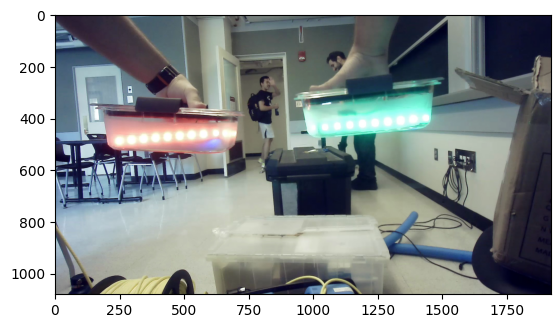

In [2]:
img = cv2.imread('image.jpg')
plt.imshow(img)

In [3]:
cap = cv2.VideoCapture('video.mp4')
ret, frame = cap.read()

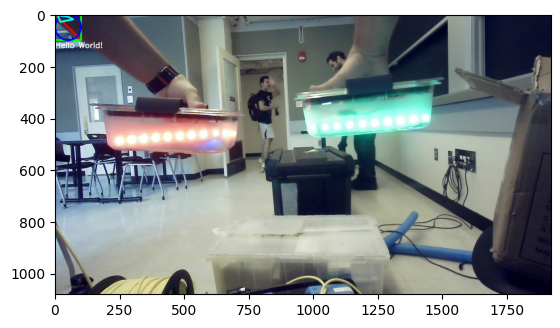

In [4]:
cv2.line(img, (0, 0), (100, 100), (255, 0, 0), 5) 
cv2.rectangle(img, (0, 0), (100, 100), (0, 255, 0), 5)
cv2.circle(img, (50, 50), 50, (0, 0, 255), 5)
pts = np.array([[10, 5], [20, 30], [70, 20], [50, 10]], np.int32)
pts = pts.reshape((-1, 1, 2))
cv2.polylines(img, [pts], True, (0, 255, 255), 5)
cv2.putText(img, 'Hello World!', (0, 130), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
plt.imshow(img)

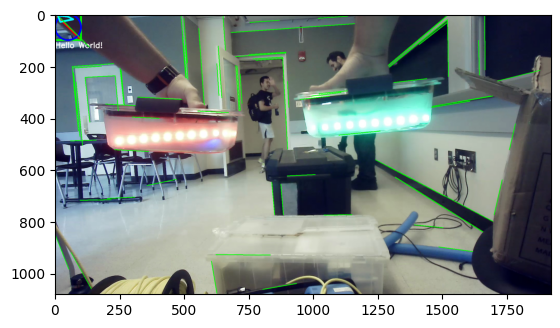

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
edges = cv2.Canny(gray, 50, 150, apertureSize=3) # detect edges
lines = cv2.HoughLinesP(
                edges,
                1,
                np.pi/180,
                100,
                minLineLength=100,
                maxLineGap=10,
        ) # detect lines

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(img)

In [6]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
edges = cv2.Canny(gray, 50, 150, apertureSize=3) # detect edges
lines = cv2.HoughLinesP(
                edges,
                1,
                np.pi/180,
                100,
                minLineLength=100,
                maxLineGap=10,
        ) # detect lines

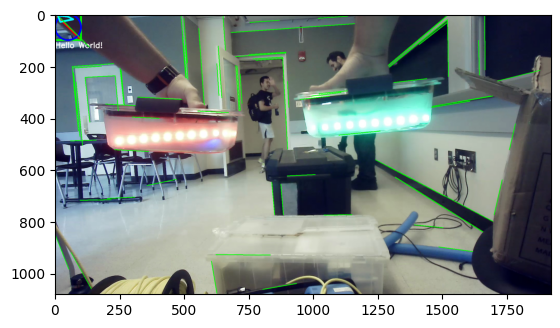

In [7]:
def get_lines(img, lines):
    slopes = []

    for line in lines:
        print(line[0])
        x1, y1, x2, y2 = line[0]
        cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        slope = (y2 - y1) / (x2 - x1)
        slopes.append(slope)
        cv2.putText(img, str(slope), (x1, y1), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 255, 255), cv2.LINE_4)

    plt.imshow(img)
    plt.show()

    return 

plt.imshow(img)

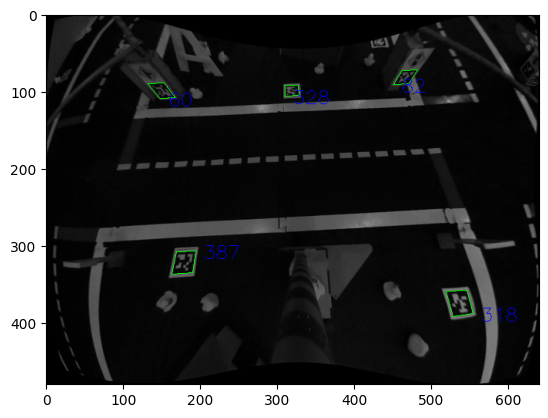

In [8]:
from dt_apriltags import Detector 
img = cv2.imread('test_image.png', cv2.IMREAD_GRAYSCALE)
at_detector = Detector(families='tag36h11',
                       nthreads=1,
                       quad_decimate=1.0,
                       quad_sigma=0.0,
                       refine_edges=1,
                       decode_sharpening=0.25,
                       debug=0)
tags = at_detector.detect(img, estimate_tag_pose=False, camera_params=None, tag_size=None)
color_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
for tag in tags:
    for idx in range(len(tag.corners)):
        cv2.line(color_img, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0))

    cv2.putText(color_img, str(tag.tag_id),
                org=(tag.corners[0, 0].astype(int) + 10, tag.corners[0, 1].astype(int) + 10),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=0.8,
                color=(0, 0, 255))
    plt.imshow(color_img)
    

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


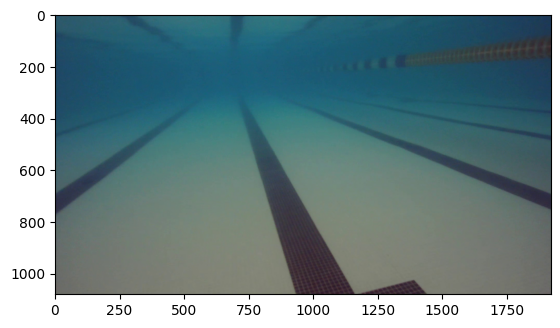

In [10]:

img = cv2.imread('rov_pool.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


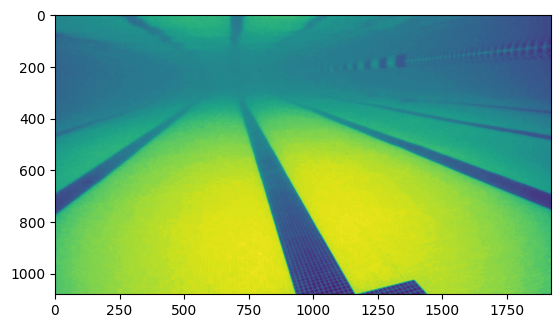

In [11]:

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
plt.imshow(gray)


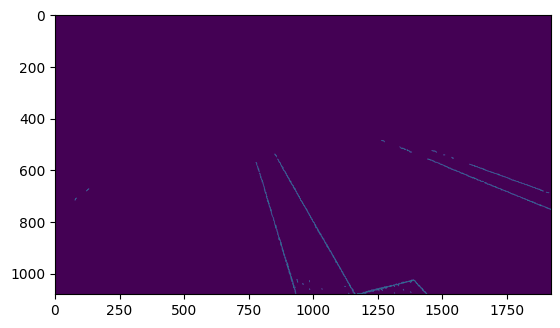

In [12]:
edges = cv2.Canny(gray, 60, 95, apertureSize=3) # detect edges
plt.imshow(edges)

In [13]:
lines = cv2.HoughLinesP(edges, 1, np.pi/360, 250, minLineLength=120, maxLineGap=10,) 
#detect lines

1.7333333333333334


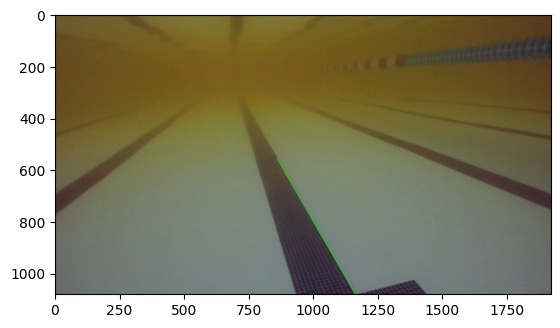

In [14]:

peeta = img.copy()
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(peeta, (x1, y1), (x2, y2), (0, 255, 0), 2)
    print((y2-y1)/(x2-x1))

plt.imshow(peeta)

In [15]:
def detect_lines(img, threshold1=50, threshold2=150, apertureSize=3, minLineLength=100, maxLineGap=10):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    edges = cv2.Canny(gray, 60, 95, apertureSize=3)
    lines = cv2.HoughLinesP(edges, 1, np.pi/360, 250, minLineLength=120, maxLineGap=10,) 
    
    return get_lines(img, lines)

In [16]:
def draw_lines(img, lines, color=(0, 255, 0)):
    for line in lines:
        x1, y1, x2, y2 = line[0]
        slope = (y2-y1)/(x2-x1)
        cv2.line(img, (x1, y1), (x2, y2), color, 2)
        cv2.putText(img, str(slope), (x1, y1), cv2.FONT_HERSHEY_COMPLEX, 1, color, cv2.LINE_4)
    return img

In [17]:
def get_slopes_interrcepts(lines):
    slopes = []
    x_intercepts = []
    for line in lines:
        x1, y1, x2, y2 = line[0] 

In [18]:
cap = cv2.VideoCapture('video.mp4')

[1557  870 1845  992]
[1296  729 1623  848]
[1725  887 1919  957]
[756 675 848 855]
[ 843  848  959 1076]
[1088  677 1472  833]
[ 788  736  930 1015]
[1476  837 1649  910]
[1705  932 1919 1022]
[1712  694 1875  722]
[1546  677 1732  713]
[1621  848 1803  914]


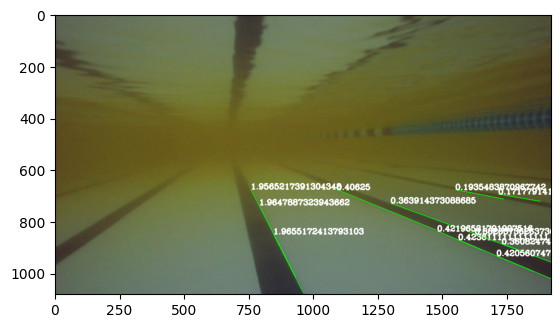

In [21]:
vid = cv2.VideoCapture('AUV_Vid.mkv')
ret, img = vid.read()
frequency = 100 
count = 0
while count < 10:
    if count%frequency == 0:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
        edges = cv2.Canny(gray, 30, 40, apertureSize=3)
        lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=150, maxLineGap=10,) 
        if (lines is None) or len(lines) == 0:
            count += 1
            ret, img = vid.read()
            continue
        equations = get_lines(img, lines)
        draw_lines(img, lines)
    count += 1
    
    ret, img = vid.read() 